# __Learning X2K: Genetic Algorithm Results__

## __Import data__

In [31]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
picFormat='png'

import numpy as np
import matplotlib.pyplot as plt
# Import my functions
import Python_scripts.Extra_X2K_functions as Ex

import os
root = os.getcwd()

# Data   
#GA_output_name = 'GA_results.100pop.10gen.GEO.run3.npy' #
#GA_output_name = 'GA_results.100pop.10gen.L1000-DRH.npy' #
#GA_output_name = 'GA_results_L1000-DRH.rboScore.npy' #
#GA_output_name = 'GA_results_GEO.RankWeightedMean.npy'
#GA_output_name = 'GA_results_GEO.wPPIlimiters.npy'
#GA_output_name = 'GA_results_GEO.wPPIlimiters_20gen.npy'
#GA_output_name = "GA_results_GEO.wPPIlimiters_20gen-try2.npy"
#GA_output_name = 'GAresults_GEO_Tournament.RBO.randCrossover.npy'\
#GA_output_name = 'GAresults_GEO_Tournament.TAO.randCrossover.npy'
#GA_output_name = 'allKinases_randomGenes.npy'
#GA_output_name = 'allKinases_randomGenes-PKlengthCorrected.npy'
GA_output_name = 'GAresults_GEO-PKlengthCorrected.npy'



results_file = root+'/GA_Results/GEO/'+GA_output_name
#results_file = root+'/GA_Results/L1000_DRH/'+GA_output_name
#results_file = root+'/GA_Results/randomGMTs/'+GA_output_name


Subset1_df, Subset2_df, GAsettings  = np.load(results_file)
# Make folder for saved images
figDir = 'Figures/'+GA_output_name
if not os.path.exists(figDir):
    os.makedirs(figDir)

tips = sn.load_dataset("tips")

## Test set

## __GA Settings__

In [32]:
GAsettings

{'binaryStringLength': 43,
 'breedingVariation': 0,
 'childrenPerGeneration': 90,
 'crossoverLocations': 'random',
 'crossoverPoints': 5,
 'fitnessMethod': 'targetAdjustedOverlap_outputLengthCorrection',
 'includeFittestParents': 10,
 'initialPopSize': 100,
 'mutationRate': 0.01,
 'numberOfGenerations': 20,
 'selectionMethod': 'mixedTournament',
 'setInitialPopulation': False,
 'topNum': 10}

## Report Peak Fitnesses

In [33]:
print('Peak fitness for Subset1 = '+str(round(peakFitness[-1],2)))
print('Peak fitness for Subset2 = '+str(round(peakFitness_Subset2[-1],2))+'\n')
print("===============================\n")

print('OPTIMIZED PARAMETERS:')
print(str(Ex.tell_parameters(Ex.getFittestIndividual(GAresults_Subset1))))

# For a more directly interpretable metric, can use 'Target-adjusted Overlap'...
# which basically equates to the % of experiments that the any target kinase was recovered anywhere in the output, divided by the number of possible targets
#rankWeightedFitness = Ex.calculateFitness( Ex.getFittestIndividual(GAresults_Subset1), fitness_method="Rank-Weighted Mean")
#print('Peak fitness [Target-Adjusted Overlap]'+str( rankWeightedFitness[0 )


avg = sum(average_PPI_sizes[-1]) / len(average_PPI_sizes[-1])
print()
print("===============================\n")
print("Average PPI size in final Subset1 population = "+str(avg));

Peak fitness for Subset1 = 0.95
Peak fitness for Subset2 = 1.26


OPTIMIZED PARAMETERS:
                                                                   0
Fitness                                                     0.954536
baselineFitness                                             0.138504
PPI_size                                                      386.89
CHEA_parameters               run;rank;mouse;transfac;humanarchs4;30
G2N_parameters     run;BIND,BIOCARTA,DIP,HPRD,INNATEDB,INTACT,PDZ...
KEA_parameters                             run;rank;humanarchs4;P;20
targetKinases      IGF1R;FGFR3;IGF1R;FGFR3;HUNK;PDGFRA;ERBB2;RAF1...
predictedKinases   MAPK8,AKT1,CSNK2A1,ABL1,CSK,CDK2,CDK5,PRKCD,MA...
TF_sort                                                         rank
TF_species                                                     mouse
TF_databases                                                transfac
TF_background                                            humanarchs4
TF_topTFs      

## __Overfitting Tests__

### Average fitness 

/Users/schilder/Library/Python/3.6/lib/python/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                    sum_sq      df           F        PR(>F)
trainingFitness   5.728248     1.0  225.904127  1.871663e-48
Residual         50.663257  1998.0         NaN           NaN
************************************************************************
Training and Test runs DO significantly differ


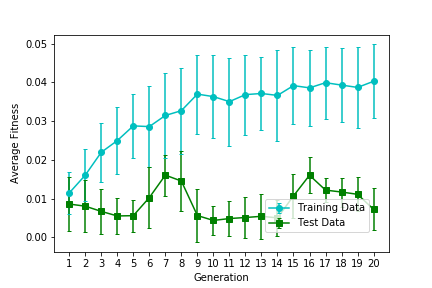

In [34]:
#y_s1 = GAresults_Subset1[2] # average fitness for each generation in TRAINED data
#y_s2 = averageFitness_Subset2

# Calculate average for subset one
y1 = allFitnesses
x = range(1,len(y1)+1)
x, y_s1 = zip(*sorted((xVal, np.mean([yVal for a, yVal in zip(x, y1) if xVal==a])) for xVal in set(x)))
# Calculate average for subset 2
y2 = allFitnesses_Subset2 
x, y_s2 = zip(*sorted((xVal, np.mean([yVal for a, yVal in zip(x, y2) if xVal==a])) for xVal in set(x)))

yerr1 = np.std(y1, axis=1)
yerr2 = np.std(y2, axis=1)
plt.errorbar(x, y_s1, yerr=yerr1, color='c', marker='o', capsize=2, label="Training Data")
plt.errorbar(x, y_s2, yerr=yerr2, color='g', marker='s', capsize=2, label="Test Data")
#plt.axhline(y=chance, linestyle="--", color='r', label="Chance Levels")
plt.title('')
plt.xlabel('Generation')
plt.ylabel('Average Fitness')
plt.xticks(np.arange(1, max(x)+1, 1))
plt.legend(loc='lower right', borderaxespad=2)
plt.gcf().set_facecolor('white')
#plt.ylim([5, 35])

plt.savefig(figDir+'/OverfittingAvg.'+picFormat, format=picFormat, dpi=1000)




# TEST OVERFITTING
import pandas as pd
## Unlist Subset1 Fitnesses
fit1_df = pd.DataFrame(Ex.parameterDF(GAresults_Subset1)['Fitness'])
fit1_df.columns = ['Average_Fitness']
fit1_df['Trained_v_Test'] = 'Trained'
## Unlist Subset2 Fitnesses
fit2 = []
for sublist in allFitnesses_Subset2:
    for item in sublist:
        fit2.append(item)
fit2_df = pd.DataFrame(fit2, columns=['Average_Fitness'])
fit2_df['Trained_v_Test'] = 'Test'

lm_data = pd.concat([fit1_df, fit2_df])
## Get OLS R2
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('Average_Fitness ~ Trained_v_Test',data=lm_data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
p = aov_table['PR(>F)'][0]
mod.summary()

print(aov_table)
print("************************************************************************")
if p>0.05:
    print('Training and Test runs do NOT significantly differ.')
else:
    print('Training and Test runs DO significantly differ');

### Peak fitness

TypeError: subplots_adjust() got an unexpected keyword argument 'right'

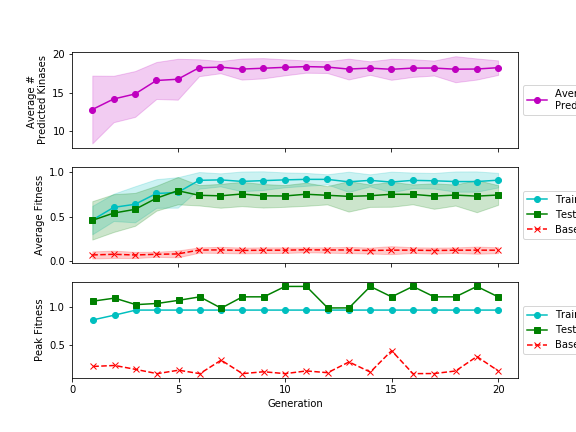

In [35]:
plt.rcParams["figure.figsize"] = (8,6)
Ex.plotFitness(Subset1_df, Subset2_df, barsOrFill="fill")
plt.subplots_adjust(right=0.6)

plt.savefig(figDir+'/FitnessSubplots.'+picFormat, format=picFormat, dpi=1000);

### Plot the distribution of ALL fitnesses in sampling of generations

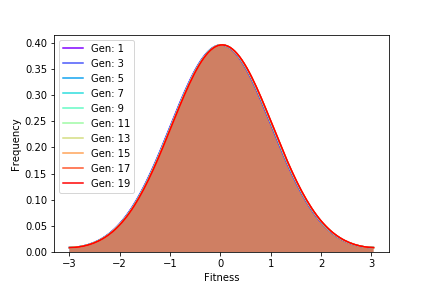

In [9]:
Ex.fitnessHistogramCurves(allFitnesses, genSpacing=2)
#plt.ylim([0,.3])
#plt.xlim([0,35])
plt.legend(loc='upper left')


plt.savefig(figDir+'/KDEfitnessPlot.'+picFormat, format=picFormat, dpi=1000);
# EPS format doesn't support transparency. Have to save as png instead.

## __4. X2K Parameters vs. Fitness Analyses__

### Plot Fitness and Parameter Evolution Over Time


___TF (CHEA) Parameters___
run;pvalue;mouse;transfac;humanarchs4;10

___PPI (G2N) Parameters___
run;BIOCARTA,FIGEYS,KEGG,MINT,MIPS,MURPHY,PDZBASE,PREDICTEDPPI;1

___KINASE (KEA) Parameters___
run;rank;humanarchs4;P;20



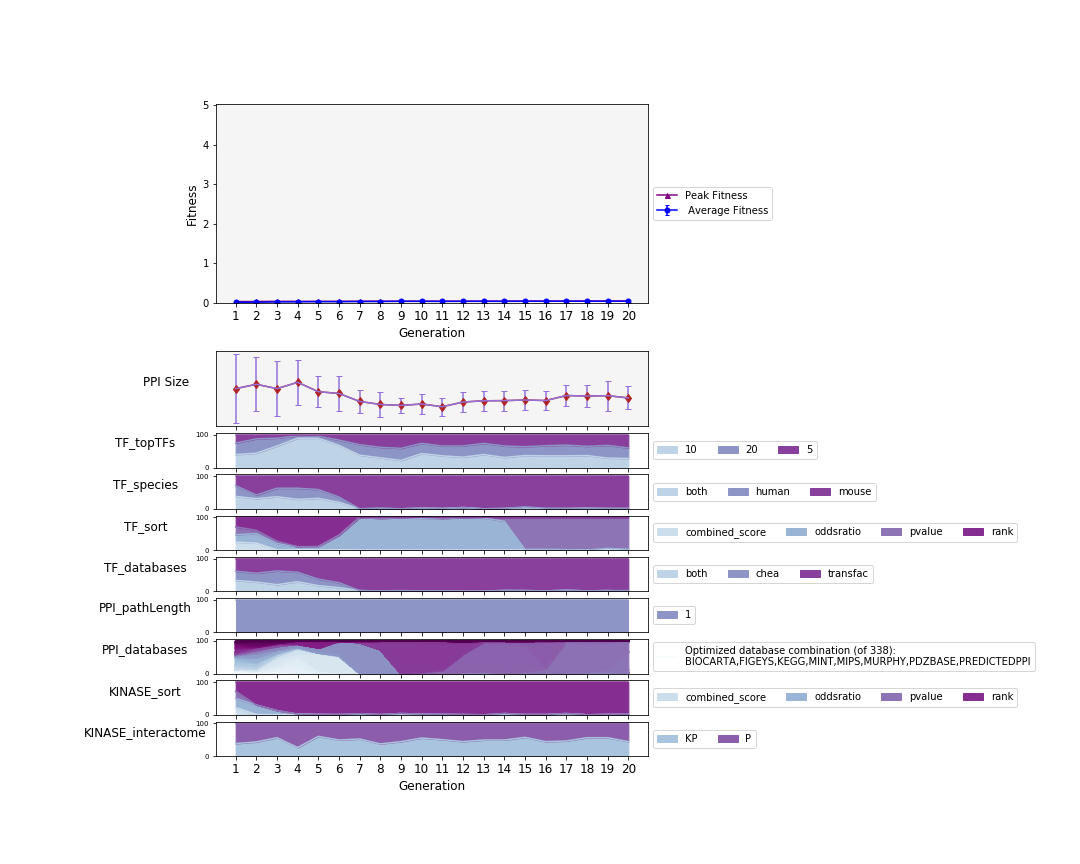

In [10]:
Ex.parameterEvolutionPlot(GAresults_Subset1,figsize=(15,12))

plt.savefig(figDir+'/ParamEvolution.'+picFormat, format=picFormat, dpi=1000);

### Plot Select X2K Parameters vs. Fitness

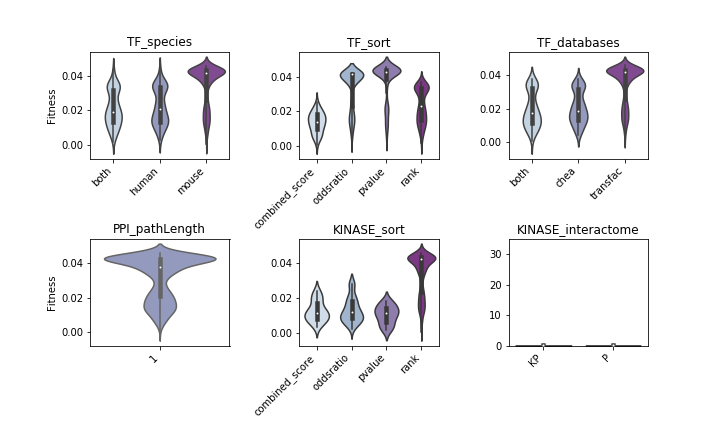

In [11]:
Ex.ParameterBoxplots(GAresults_Subset1, numRows=2, numCols=3, figSize=(10,6))
plt.ylim([0,35])

plt.savefig(figDir+'/Parameters.Vs.Fitness.'+picFormat, format=picFormat, dpi=1000);

### One-way ANOVAs: Each parameter vs. Fitness

In [11]:
#Ex.parameterStats(GAresults_Subset1, writeExcel=figDir+"/Parameter.v.Fitness_ANOVA.table.xlsx")
#plt.savefig(figDir+'/Parameter.v.Fitness_ANOVA.table.eps', format='eps', dpi=1000)